# Common Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Common data transformations

In [3]:
from pyFTS.common import Transformations

tdiff = Transformations.Differential(1)

boxcox = Transformations.BoxCox(0)

# Import Datasets

In [32]:
from pyFTS.data import TAIEX, NASDAQ, SP500

dataset_names = ["TAIEX", "SP500","NASDAQ"]

def get_dataset(dataset_name):
    if dataset_name == "TAIEX":
        return TAIEX.get_data()
    elif dataset_name == "SP500":
#         return SP500.get_data()[11500:16000]
        return SP500.get_dataframe()[11500:16000]
    elif dataset_name == "NASDAQ":
        df = NASDAQ.get_dataframe()[:4000]
        cols = df.columns.str.split(',')
        df = df.iloc[:,0].str.split(',',expand=True)
        df.columns = cols[0]
#         return NASDAQ.get_data()
        return df.Close.values.astype(np.float)


train_split = 2000
test_length = 200

In [33]:
a = get_dataset('SP500')
b = get_dataset('NASDAQ')
c = get_dataset('TAIEX')

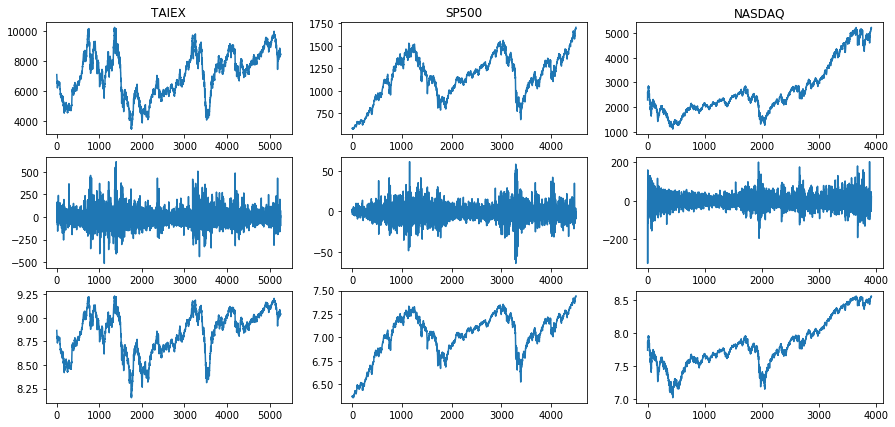

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[15,7])

for count,dataset_name in enumerate(dataset_names):
    dataset = get_dataset(dataset_name)
    dataset_diff = tdiff.apply(dataset)
    dataset_boxcox = boxcox.apply(dataset)

    ax[0][count].plot(dataset)
    ax[1][count].plot(dataset_diff)
    ax[2][count].plot(dataset_boxcox)
    ax[0][count].set_title(dataset_name)